# Reading and Writing Audio Files with PySoundFile

[back to overview page](index.ipynb)

There are many libraries for handling audio files with Python (see [overview page](index.ipynb)), but the best one is probably [PySoundFile](http://github.com/bastibe/PySoundFile).

Full documentation including installation instructions is available at http://pysoundfile.readthedocs.org/.

Advantages: 

* supports many file formats (thanks to libsndfile)
  * WAV, OGG, FLAC and many more
  * see [bottom of this notebook](#Available-Formats) for full list of supported formats
* supports 24-bit PCM and 32-bit floating point WAV files
* WAVEX support
* can read parts of audio files
* automatic type conversion and normalization
* works in CPython 2.x and 3.x and in PyPy as well
* provides audio data as NumPy arrays by default, but it can also work with plain Python buffer objects if NumPy is not available

Disadvantages:

* no MP3 support

## Reading

This is the quickest way to load a WAV file into a NumPy array (using [soundfile.read()](http://pysoundfile.readthedocs.org/#soundfile.read)):

In [1]:
import soundfile as sf
sig, samplerate = sf.read('data/test_wav_pcm16.wav')

That's all. Easy, isn't it?

But let's have a closer look ...

The test file is not a very typical file, because it only has 15 frames but it has 7 channels:

In [2]:
sig.shape

(15, 7)

In [3]:
samplerate

44100

Let's check the contents of the file by plotting thw audio waveform:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

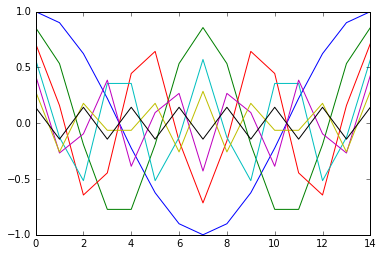

In [5]:
plt.plot(sig);

Looking good!

In most cases [soundfile.read()](http://pysoundfile.readthedocs.org/#soundfile.read) is all you need, but for some advanced use cases, you might want to use a [soundfile.SoundFile](http://pysoundfile.readthedocs.org/#soundfile.SoundFile) object instead:

In [6]:
f = sf.SoundFile('data/test_wav_pcm16.wav')

In [7]:
len(f), f.channels, f.samplerate

(15, 7, 44100)

In [8]:
f.format, f.subtype, f.endian

('WAV', 'PCM_16', 'FILE')

In [9]:
test = f.read()
test.shape

(15, 7)

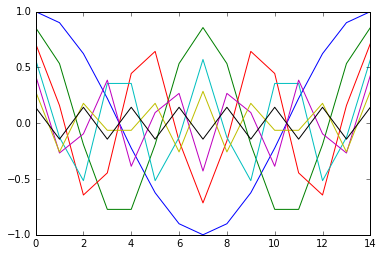

In [10]:
plt.plot(test);

In [11]:
(test == sig).all()

True

As you can see, you get the same data as with `sf.read()`.

In [12]:
# TODO: read mono file
# mono data is by default returned as one-dimensional NumPy array,
# this can be changed with always_2d=True

24-bit files work:

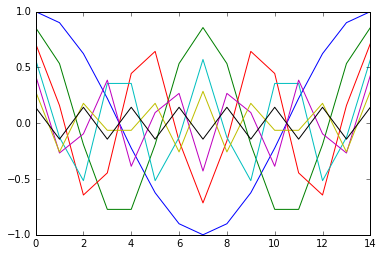

In [13]:
sig, samplerate = sf.read('data/test_wav_pcm24.wav')
plt.plot(sig);

WAVEX is supported:

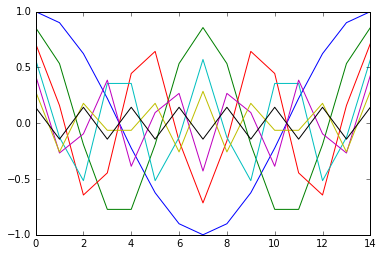

In [14]:
sig, samplerate = sf.read('data/test_wavex_pcm16.wav')
plt.plot(sig);

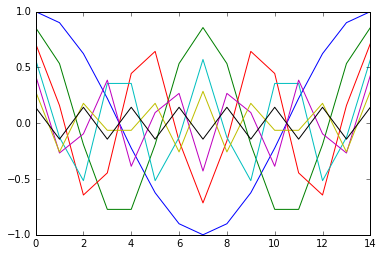

In [15]:
sig, samplerate = sf.read('data/test_wavex_pcm24.wav')
plt.plot(sig);

32-bit float files work:

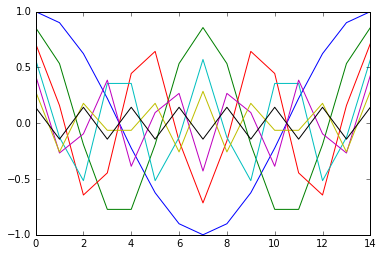

In [16]:
sig, samplerate = sf.read('data/test_wav_float32.wav')
plt.plot(sig);

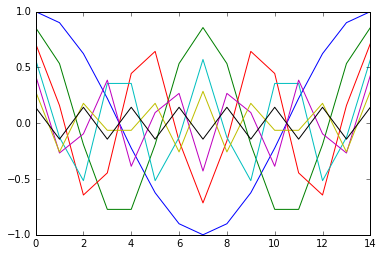

In [17]:
sig, samplerate = sf.read('data/test_wavex_float32.wav')
plt.plot(sig);

It also works in PyPy:

In [18]:
%%pypy
import soundfile as sf

sig, samplerate = sf.read('data/test_wav_pcm16.wav')

sig2, samplerate2 = sf.read('data/test_wavex_pcm16.wav')

print "Everything is fine:", (sig == sig2).all() and samplerate == samplerate2 == 44100

import sys
print sys.version

Everything is fine: True
2.7.10 (2.6.1+dfsg-2, Sep 22 2015, 00:55:08)
[PyPy 2.6.1 with GCC 5.2.1 20150911]


## Writing

Writing audio data to a file (using [soundfile.write()](http://pysoundfile.readthedocs.org/#soundfile.write)) is as simple as reading from a file:

In [19]:
sf.write('my_pcm16_file.wav', sig, samplerate)

Let's check if this file has really been written:

In [20]:
!sndfile-info my_pcm16_file.wav


Version : libsndfile-1.0.25

File : my_pcm16_file.wav
Length : 254
RIFF : 246
WAVE
fmt  : 16
  Format        : 0x1 => WAVE_FORMAT_PCM
  Channels      : 7
  Sample Rate   : 44100
  Block Align   : 14
  Bit Width     : 16
  Bytes/sec     : 617400
data : 210
End

----------------------------------------
Sample Rate : 44100
Frames      : 15
Channels    : 7
Format      : 0x00010002
Sections    : 1
Seekable    : TRUE
Duration    : 00:00:00.000
Signal Max  : 0 (-inf dB)



Note that by default, WAV files are written as 16-bit fixed point data (a.k.a. `'PCM_16'`).
You can find the default setting for each file format with [soundfile.default_subtype()](http://pysoundfile.readthedocs.org/#soundfile.default_subtype):

In [21]:
sf.default_subtype('WAV')

'PCM_16'

If you want to save your file with a better quality setting (especially if you want to do further processing later), you can, for example, use the 32-bit floating point format:

In [22]:
sf.write('my_float_file.wav', sig, samplerate, subtype='FLOAT')

Let's check if this worked:

In [23]:
!sndfile-info my_float_file.wav


Version : libsndfile-1.0.25

File : my_float_file.wav
Length : 548
RIFF : 540
WAVE
fmt  : 16
  Format        : 0x3 => WAVE_FORMAT_IEEE_FLOAT
  Channels      : 7
  Sample Rate   : 44100
  Block Align   : 28
  Bit Width     : 32
  Bytes/sec     : 1234800
fact : 4
  frames  : 15
PEAK : 64
  version    : 1
  time stamp : 1445875636
    Ch   Position       Value
     0   0              1
     1   0              0.857143
     2   0              0.714286
     3   0              0.571429
     4   0              0.428571
     5   0              0.285714
     6   0              0.142857
data : 420
End

----------------------------------------
Sample Rate : 44100
Frames      : 15
Channels    : 7
Format      : 0x00010006
Sections    : 1
Seekable    : TRUE
Duration    : 00:00:00.000
Signal Max  : 0 (-inf dB)



You can get all available subtypes for a given format with [soundfile.available_subtypes()](http://pysoundfile.readthedocs.org/#soundfile.available_subtypes):

In [24]:
sf.available_subtypes('WAV')

{'ALAW': 'A-Law',
 'DOUBLE': '64 bit float',
 'FLOAT': '32 bit float',
 'G721_32': '32kbs G721 ADPCM',
 'GSM610': 'GSM 6.10',
 'IMA_ADPCM': 'IMA ADPCM',
 'MS_ADPCM': 'Microsoft ADPCM',
 'PCM_16': 'Signed 16 bit PCM',
 'PCM_24': 'Signed 24 bit PCM',
 'PCM_32': 'Signed 32 bit PCM',
 'PCM_U8': 'Unsigned 8 bit PCM',
 'ULAW': 'U-Law'}

## Available Formats

You can get all available formats with [soundfile.available_formats()](http://pysoundfile.readthedocs.org/#soundfile.available_formats):

In [25]:
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (FLAC Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'NIST': 'WAV (NIST Sphere)',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

... and all available subtypes with [soundfile.available_subtypes()](http://pysoundfile.readthedocs.org/#soundfile.available_subtypes):

In [26]:
sf.available_subtypes()

{'ALAW': 'A-Law',
 'DOUBLE': '64 bit float',
 'DPCM_16': '16 bit DPCM',
 'DPCM_8': '8 bit DPCM',
 'DWVW_12': '12 bit DWVW',
 'DWVW_16': '16 bit DWVW',
 'DWVW_24': '24 bit DWVW',
 'FLOAT': '32 bit float',
 'G721_32': '32kbs G721 ADPCM',
 'G723_24': '24kbs G723 ADPCM',
 'GSM610': 'GSM 6.10',
 'IMA_ADPCM': 'IMA ADPCM',
 'MS_ADPCM': 'Microsoft ADPCM',
 'PCM_16': 'Signed 16 bit PCM',
 'PCM_24': 'Signed 24 bit PCM',
 'PCM_32': 'Signed 32 bit PCM',
 'PCM_S8': 'Signed 8 bit PCM',
 'PCM_U8': 'Unsigned 8 bit PCM',
 'ULAW': 'U-Law',
 'VORBIS': 'Vorbis',
 'VOX_ADPCM': 'VOX ADPCM'}

## Version Info

In [27]:
print("PySoundFile version:", sf.__version__)

import sys
print("Python version:", sys.version)

PySoundFile version: 0.8.1
Python version: 3.4.3+ (default, Oct 10 2015, 09:15:38) 
[GCC 5.2.1 20151003]


<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>